# Assignment 5 - MCMC Methods in Julia
## Pranshu Gaur - 200703

### QUESTION 1

### Section 2 - Barker's method and the two-coin algorithm

Given a current state of the Markov chain $x$, and a proposal density $q(x, y)$, the Barker's Acceptance Probability is 
$$\alpha_{B}(x, y) = \frac{\pi(y)q(y, x)}{\pi(x)q(x, y) + \pi(y)q(y, x)}$$

We can obtain at time m+1 realization by drawing $U \sim U[0,1]$ and checking if $U \leq \alpha_{B}(x, y)$ but this is not possible when $\alpha_{B}(x, y)$ cannot be evaluated, so the way out is to construct a Bernoulli factory to obtain events of probability $\alpha_{B}(x, y)$ without evaluating it.

The Algorithm for the same is : 

#### Algorithm 1 : Baker's MCMC for $x_{m+1}$
* Draw $y \sim q(x_m, dy)$ 
* Draw $A \sim$ Bern $(\alpha_B(x_m, y))$
* If A = 1 then
    * $x_{m+1} = y$
* If A = 0 then
    * $x_{m+1} = x_m$



Goncalves proposed a different algorithm to sample events with probability $\alpha_B(x,y)$ \
He supposed $\pi(x)q(x, y) = c_xp_x$, where $c_x$ is the local bound on $\pi(x)q(x, y)$ such that $p_x$ remains a valid probability. \
That is, $c_x \geq \pi(x)q(x, y)$ and hence $p_x = \pi(x)q(x, y) c_x^{-1}$

The Algorithm is as follows :

#### Algorithm 2 : two-coin algorithm for $\alpha_B(x_m, y)$
* Draw $C1 \sim (\large{\frac{c_y}{c_y + c_x}})$ 
* If $C1 = 1$ then
    * Draw $C2 \sim$ Bern $(p_y)$
        * If $C2 = 1$ then
            output 1
        * If $C2 = 0$ then
            go to Step 1    
* If $C1 = 0$ then
    * Draw $C2 \sim$ Bern $(p_x)$
        * If $C2 = 1$ then
            output 0
        * If $C2 = 0$ then
            go to Step 1
<!-- Draw C1 ∼ Bern
cy
cy + cx

2: if C1 = 1 then
3: Draw C2 ∼ Bern(py)
4: if C2 = 1 then
5: output 1
6: if C2 = 0 then
7: go to Step 1
8: if C1 = 0 then
9: Draw C2 ∼ Bern(px)
10: if C2 = 1 then
11: output 0
12: if C2 = 0 then
13: go to Step 1 -->



As proved in Assignment 2, the two-coin Algorithm generates a $Bern(\large{\frac{p_yc_y}{p_xc_x + p_yc_y}})$ event.

As proved in Assignment 2, the average number of iterations to get an output is, $\large{N = \frac{1}{P_{out}} = \frac{c_x + c_y}{p_xc_x + p_yc_y}}$, hence the execution time depends heavily on the upper bounds, $c_x$ and $c_y$. If the bounds are loose then the algorithm yields a larger mean execution time.
 


### Section 3 - Portkey Barker's method

The main inefficiency in Barker's method is the inefficiency of two-coin algorithm, hence let us consider the acceptance probability for a proposed density $q(x,y)$ as 
$$ \alpha_B(x,y) = \frac{\pi(y)q(y, x)}{\pi(x)q(x, y) + \pi(y)q(y, x) + d(x,y)}$$

here $d(x,y) = d(y,x) \geq 0 $ 

This $\alpha_B(x,y) $ yields a $\pi$ reversible Markov Chain which means that $π(y)q(y, x)\alpha(y, x) = π(x)q(x, y)\alpha(x, y).$

For a user-chosen $0 < \beta ≤ 1$, consider the following Portkey Barker’s Acceptance
Probability: $$\alpha_{(\beta)}(x, y) = \frac{π(y)q(y, x)} {π(y)q(y, x) + π(x)q(x, y) + \frac{(1 − \beta)}{\beta}(c_x + c_y)}$$

where $\beta \sim 1$

The portkey algorithm modifies the two-coin algorithm by introducing a new step in the beginning where proposals are rejected with a probability of $1 - \beta$. The Algorithm is as follows :

#### Algorithm 3: Portkey two-coin algorithm

* Draw $S \sim$ Bern $(\beta)$ 
* If $S = 0$ then
    output 0
* If $S = 1$ then
    * Draw $C1 \sim (\large{\frac{c_y}{c_y + c_x}})$ 
        * If $C1 = 1$ then
            * Draw $C2 \sim$ Bern $(p_y)$
                * If $C2 = 1$ then
                     output 1
                * If $C2 = 0$ then
                     go to Step 1    
        * If $C1 = 0$ then
            * Draw $C2 \sim$ Bern $(p_x)$
                * If $C2 = 1$ then
                     output 0
                * If $C2 = 0$ then
                     go to Step 1

Using the result for Algorithm 2, the number of loops until the algorithm stops is given by, $s_{\beta} = (1 - \beta) + \beta.\large{\frac{c_yp_y + c_xp_x}{c_x + c_y}}$

When $\beta = 1$, the Portkey Algorithm is same as Barker's two-coin Algorithm. Comparing the ratio of mean execution time of both the algorithms, 
$$\frac{1/s_1}{1/s_{\beta}} = \frac{s_{\beta}}{s_1} = (1 - \beta).(\frac{c_yp_y + c_xp_x}{c_x + c_y})^{-1}$$
Thus, if $\frac{c_yp_y + c_xp_x}{c_x + c_y}$ tends to 0, then the original two-coin algorithm is not useful as the execution time ratio diverges to infinity, on the other hand if the value tends to 1, then both the algorithms are equally efficient. When $p_x$ or $p_y$ is small, it is advised to take large value of $\beta$.

### Section 4 - Flipped portkey two-coin algorithm

This algorithm provides an alternative if finding a suitable $c_x$ is challenging. It may be easier to find a lower bound on $\pi(x)q(x,y)$, in other words, an upper bound on $\pi(x)^{-1}q(x,y)^{-1}.$ \
Hence, $\pi(x)^{-1}q(x,y)^{-1} = \tilde{c_x}\tilde{p_x}$

The algorithm is as follows :

* Draw $S \sim$ Bern$(\beta)$ 
* If $S = 0$ then
    output 0
* If $S = 1$ then
    * Draw $C1 \sim (\large{\frac{\tilde{c_y}}{\tilde{c_y} + \tilde{c_x}}})$ 
        * If $C1 = 1$ then
            * Draw $C2 \sim$ Bern $(\tilde{p_y})$
                * If $C2 = 1$ then
                     output 1
                * If $C2 = 0$ then
                     go to Step 1    
        * If $C1 = 0$ then
            * Draw $C2 \sim$ Bern $(\tilde{p_x})$
                * If $C2 = 1$ then
                     output 0
                * If $C2 = 0$ then
                     go to Step 1

This algorithm is similar to the Portkey Barker's Method except that it is flipped. So, the Acceptance Probability of this algorithm is,
$$\alpha_{f,(\beta)}(x,y) = \frac{π(y)q(y, x)} {π(y)q(y, x) + π(x)q(x, y) + \frac{(1 − \beta)}{\beta}(\tilde{c_x} + \tilde{c_y})}$$ \
Now, replacing $\pi(x)^{-1}q(x,y)^{-1}$ with $\tilde{c_x} \tilde{p_x}$,

$$\implies \alpha_{f,(\beta)}(x,y) = \frac{(\tilde{c_y} \tilde{p_y})^{-1}} {(\tilde{c_y}\tilde{p_y})^{-1} + (\tilde{c_x}\tilde{p_x})^{-1} + \frac{(1 − \beta)}{\beta}(\tilde{c_x} + \tilde{c_y})}$$

$$\implies \alpha_{f,(\beta)}(x,y) = \frac{\tilde{c_x} \tilde{p_x}}{\tilde{c_x}\tilde{p_x} + \tilde{c_x}\tilde{p_x} + \large{\frac{(1 − \beta)}{\beta}(\frac{\tilde{c_x} + \tilde{c_y}}{\tilde{c_x}\tilde{p_x}\tilde{c_y}\tilde{p_y}})}}$$

If generating $p_x$ coins is challenging, one should chose the flipped portkey algorithm over the normal portkey algorithm. 

---

### QUESTION 2

In [1]:
using Distributions
using Random
using StatsPlots
using SpecialFunctions
using StatsBase
Random.seed!(69)

function c_t(theta,k)
    return k/(exp(1)*theta)
end
function dist(lambda,k,theta)
    x = pdf(Weibull(k,lambda),theta)
    z = c_t(theta,k)
    return x/z
end

dist (generic function with 1 method)

In [2]:
function two_coin(beta,k,next,sam,draw)
    while true
        S = rand(Bernoulli(beta))
        if(S==0) 
            return 0
        end
        C1 = rand(Bernoulli(draw))
        if(C1==1) 
            lambda = rand(Gamma(10,0.01))
            py = dist(lambda,k,next)
            C2 = rand(Bernoulli(py))
            if(C2==1) 
                return 1
            end
            if(C2==0)
                continue
            end
        end
        if(C1==0)
            lambda = rand(Gamma(10,0.01))
            px = dist(lambda,k,sam)
            C2 = rand(Bernoulli(px))
            if(C2==1)
                return 0
            end
            if(C2==0)
                continue
            end
        end
    end
end

two_coin (generic function with 1 method)

In [3]:
function portkey_barker(size,beta,k)
    samples = fill(1.00,size)
    samples[1] = 0.1
    for i in 2:size
        next = rand(Normal(samples[i-1],sqrt(0.001)))
#         next = -1
        if(next<0)
            samples[i] = samples[i-1]
            continue
        end
        cx = c_t(samples[i-1],k)
        cy = c_t(next,k)
#         println(cx)
#         println(cy)
        A = two_coin(beta,k,next,samples[i-1],(cy/(cx+cy)))
        if(A==1) 
            samples[i] = next
        end
        if(A==0)
            samples[i] = samples[i-1]
        end
    end
    return samples
end        

portkey_barker (generic function with 1 method)

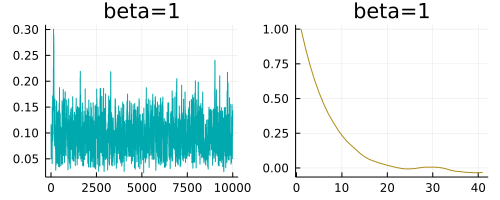

In [4]:
p1 = plot(portkey_barker(10000,1,10),size=(500,200),color=6)

p2 = plot(autocor(portkey_barker(10000,1,10)),size=(500,200),color=5)
plot(p1,p2,layout=(1,2),title="beta=1",label="")

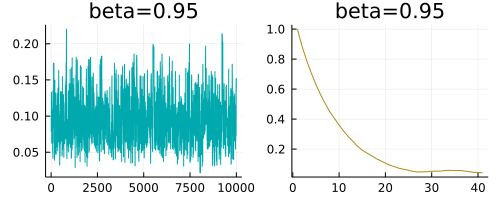

In [5]:
p1 = plot(portkey_barker(10000,0.95,10),size=(500,200),color=6)
plot(portkey_barker(10000,0.9,10))
p2 = plot(autocor(portkey_barker(10000,0.95,10)),size=(500,200),color=5)
plot(p1,p2,layout=(1,2),title="beta=0.95",label="")

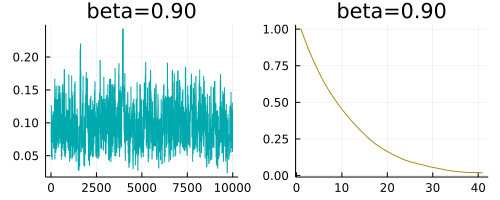

In [6]:
p1 = plot(portkey_barker(10000,0.90,10),size=(500,200),color=6)

p2 = plot(autocor(portkey_barker(10000,0.90,10)),size=(500,200),color=5)
plot(p1,p2,layout=(1,2),title="beta=0.90",label="")

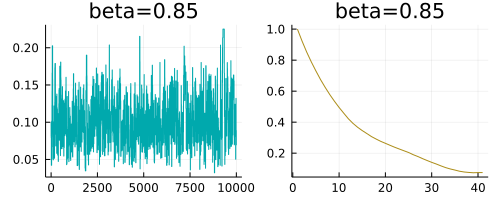

In [7]:
p1 = plot(portkey_barker(10000,0.85,10),size=(500,200),color=6)

p2 = plot(autocor(portkey_barker(10000,0.85,10)),size=(500,200),color=5)
plot(p1,p2,layout=(1,2),title="beta=0.85",label="")

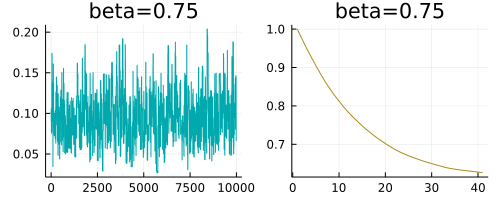

In [8]:
p1 = plot(portkey_barker(10000,0.75,10),size=(500,200),color=6)

p2 = plot(autocor(portkey_barker(10000,0.75,10)),size=(500,200),color=5)
plot(p1,p2,layout=(1,2),title="beta=0.75",label="")

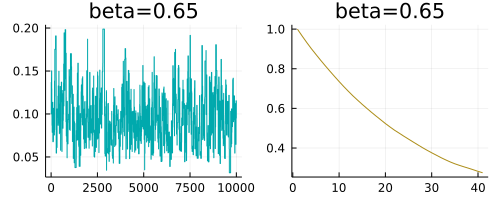

In [9]:
p1 = plot(portkey_barker(10000,0.65,10),size=(500,200),color=6)

p2 = plot(autocor(portkey_barker(10000,0.65,10)),size=(500,200),color=5)
plot(p1,p2,layout=(1,2),title="beta=0.65",label="")

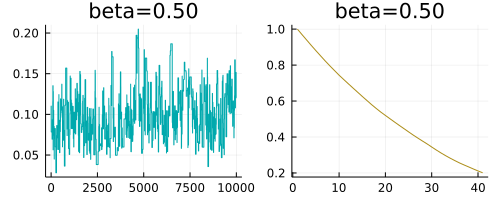

In [10]:
p1 = plot(portkey_barker(10000,0.50,10),size=(500,200),color=6)

p2 = plot(autocor(portkey_barker(10000,0.50,10)),size=(500,200),color=5)
plot(p1,p2,layout=(1,2),title="beta=0.50",label="")